<a href="https://colab.research.google.com/github/Raul-rx7/projeto_circuitos_rc/blob/main/pre_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma abordagem de ensino de circuitos ultilizando a linguagem de programação Python

##### Obs.: Título pode sofrer mudanças ... 

#### Título alternativo:
- Uma alternativa de ensino sobre circuitos RC atráves da linguagem de programação Python.

## Resumo do trabalho
Tendo em vista a importância da utilização da linguagem de programação *Python* para as ciências atualmente, pois a mesma vem sendo o pilar de inumeros tipos de estudos, o presente trabalho tem como objetivo apresentar uma ferramenta educacional de ensino de circuitos RC, buscando auxiliar na revisão do conteúdo, simulações e resolução de problemas. Tal material revela o grande potencial para o ensino de Física introduzindo conceitos básicos de *Python*, podendo ser utilizado por professores e estudantes, e está disponível livremente na internet.

In [ ]:
# 1º Passo: Importando as bibliotecas necessárias
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Circuitos RC: uma breve revisão

- Carregando o capacitor:
$$q = cv(1 - e^{-t/T})$$

$$i = \frac{v}{R} e^{-t/T}$$

- Descarregando o capacitor:
$$q_{2} = Q_{0} e^{-t/T}$$


$$i_{2} = -\frac{Q_{0}}{RC} e^{-t/T} = I_{0}e^{-t/T}$$

- Lembrando alguns prefixos para as potências de dez: 
  - $k$ (kilo) : $10^{3}$
  - $c$ (centi) : $10^{-2}$
  - $m$ (mili) : $10^{-3}$
  - $\mu$ (micro) : $10^{-6}$
  - $n$ (nano) : $10^{-9}$
  - $p$ (pico) : $10^{-12}$
  - $f$ (femto) : $10^{-15}$

In [ ]:
# 2º Passo:

############### DEFINIÇÃO DAS FUNÇÕES DESCRITAS ACIMA ################ 
#  OBS.: AS FUNÇÕES ABAIXO PODEM SER UTILIZADAS A QUALQUER MOMENTO   #
######################################################################

# Circuito R-C
# Carregando um capacitor:
def Q(c, r, v, t):
  return (c*v)*(1 - np.exp(-t/(r*c)))


# Corrente instantânea
def I(c, r, v, t):
  return v*(np.exp(-t/(r*c)))/r


# Descarregando um capacitor:
def Q2(c, r, v, t):
  #      Q0 : ponto de partida (ao carregar) 
  return Q(c, r, v, t).max()*np.exp(-t/(r*c))


# Corrente instantânea
def I2(c, r, v, t):
  return -Q2(c, r, v, t)/(r*c)

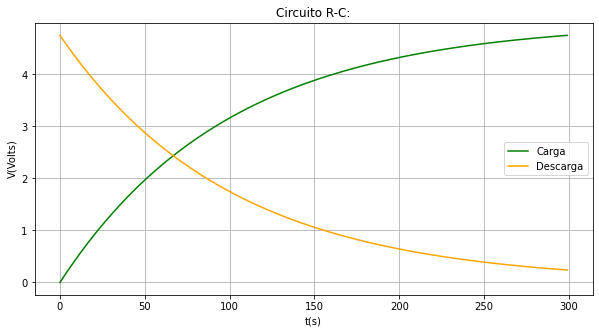

In [ ]:
# 3º passo: Simulações de carga e descarga do capacitor.
# É preciso indicar os valores de capacitância, resistência, voltagem e o 
# tempo de observação, para simulação de carga e descarga.

# Obs.: Atenção com as unidades de medidas e potências de dez!
 
C = 1*(10**(-2))          # Farad
R = 10*(10**(3))          # Ohms
V = 5                     # Volts
t = np.arange(0, 300, 1)  # 300 segs

q = Q(C, R, V, t)
i = I(C, R, V, t)

q2 = Q2(C, R, V, t)
i2 = I2(C, R, V, t)

# Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10,5))
plt.plot(t, q/C, color="green", label="Carga") # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga")
plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()

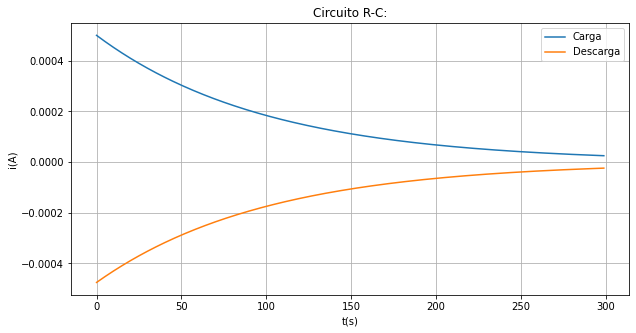

In [ ]:
# Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10,5))
plt.plot(t, i, label= "Carga")
plt.plot(t, i2, label= "Descarga")

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()

### Resultados da teoria
- Acima segue as simulações realizadas a partir da teoria;
- Note que os parâmetros (os dados) podem ser modificados, tais como a **capacitância**, **resistência** e **ddp**, assim como **tempo (seg)** de observação da simulação.

## EXEMPLO 27.12 - Sears e Zemansky - Física III - Young & Freedman - 10ª edição
####Carregando um capacitor
Um resistor com resistências 10 M$Ω$ é conectado em série com um capacitor cuja capacitância é de 1,0 $\mu$F e com uma bateria de fem igual a 12 V. Antes de a chave ser fechada no instante t = 0, o capacitor está descarregado. 

a) Qual é a constante de tempo? 

b) Qual é a fração da carga final que está sobre uma das placas quando $t = 46 s$?

c)Qual é a fração da corrente inicial que permanece quando t = 46 s? 

In [ ]:
# As funções definidas no 2ª passo, podem ser utilizadas aqui também.
# Primeiro é preciso definir a resistência, capacitância e tempo.
R = 10*10**6 
C = 10**(-6)
V = 12
t = 46  # No instante 46 seg. 


print(f"Solução\na) {R*C}")
print(f"b) {Q(C, R, V, t)/(C*V)}")
print(f"c) {I(C, R, V, t)/(V/R)}")

Solução
a) 10.0
b) 0.9899481642553665
c) 0.010051835744633588 = 1.0051835744633588 


Depois de um tempo igual a 4,6 constantes de tempo, a corrente diminui para 1% do seu valor inicial.

---
## Resultados na prática
Os seguintes resultados foram obtidos a partir da coleta de dados nas simulações no ambiente do [laboratório virtual de Física da UFC](https://www.laboratoriovirtual.fisica.ufc.br/simulacoes).

In [ ]:
# NA PRÁTICA
# PROCEDIMENTO 1:
data = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120],
                    'v': [0, 2.75, 4.35, 5.50, 6.60, 7.40, 7.80, 8.67, 9.20, 9.50, 9.72, 9.82, 9.93, 9.98]})

data2 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 7.26, 5.50, 4.20, 3.50, 2.61, 2.16, 1.33, 0.83, 0.50, 0.33, 0.18, 0.07, 0.02]})

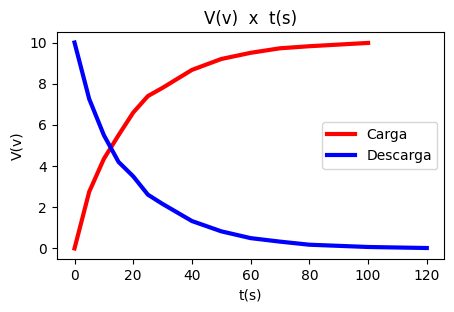

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data['t'], data['v'], 'r-', label='Carga',lw = 3)
ax.plot(data2['t'], data2['v'], 'b-' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s)')
ax.legend(loc=0)
fig.savefig('v_t');

Observe que os gráficos são semelhantes, de maneira que comprova a eficácia da codificação escrita baseada na teoria.

In [ ]:
data3 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 7.10, 5.60, 4.28, 3.53, 2.63, 2.09, 1.31, 0.80, 0.49, 0.30, 0.18, 0.07, 0.02]})

In [ ]:
data4 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [-10, -7.16, -5.74, -4.36, -3.41, -2.74, -2.11, -1.34, -0.81, -0.48, -0.30, -0.19, -0.06, -0.02]})

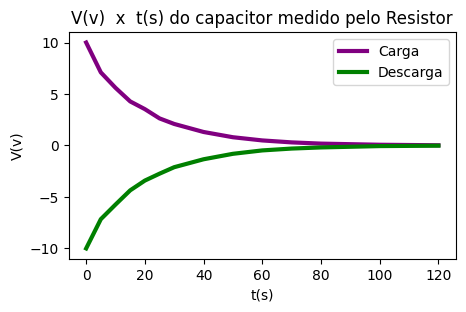

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data3['t'], data3['v'], 'purple', label='Carga',lw = 3)
ax.plot(data4['t'], data4['v'], 'green' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s) do capacitor medido pelo Resistor')
ax.legend(loc=0)
fig.savefig('v_t4');

In [ ]:
data5 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'i': [303, 210, 160, 130, 107, 80, 60, 40, 24, 14, 9, 5.4, 2.1, 6]})

In [ ]:
data6 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'i': [-303, -217, -173, -132, -103, -83, -64, -40.6, -24.5, -14.5, -9.1, -5.75, -1.81, -6]})

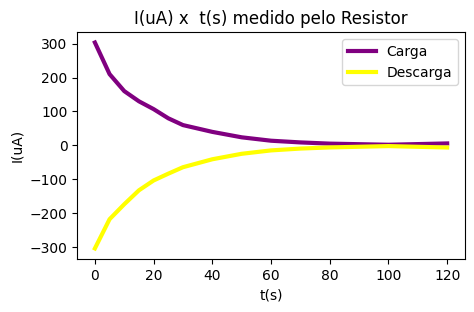

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data5['t'], data5['i'], 'purple', label='Carga',lw = 3)
ax.plot(data6['t'], data6['i'], 'yellow' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('I(uA)')
ax.set_title('I(uA) x  t(s) medido pelo Resistor')
ax.legend(loc=0)
fig.savefig('v_t5');